## data cleaning and preprocessing

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# check if data have missing values
df_scl = pd.read_csv('data/归一化的100hz SCL特征/merged_scl_features.csv')
df_scr = pd.read_csv('data/100hz SCR 特征/filtered_scr_features_complete.csv')
df_gsr = pd.read_csv('data/100hzGSR特征/all_segments_features.csv')



# 查看哪些是空列，如果有空列，删除空列
null_columns_gsr = df_gsr.columns[df_gsr.isnull().all()]
print(null_columns_gsr)
for i in range(len(null_columns_gsr)):
    df_gsr.drop(null_columns_gsr[i], axis=1, inplace=True)
    


# # if there are missing values, print the columns with missing values
# print(df_scl.columns[df_scl.isnull().any()])
# print(df_scr.columns[df_scr.isnull().any()])
# print(df_gsr.columns[df_gsr.isnull().any()])





# fill missing values with imputation (样条插值)
df_scl = df_scl.interpolate(method='spline', order=3)
df_gsr = df_gsr.interpolate(method='spline', order=3,limit_direction='both')
# 在df_scr里面，如果Segment为1的列，填充这个整个行的空值为0，其他的行用样条插值
df_scr.loc[df_scr['Segment'] == 1] = df_scr.loc[df_scr['Segment'] == 1].fillna(0)
df_scr = df_scr.interpolate(method='spline', order=3,limit_direction='both')


# check if there are still missing values
print(df_scl.columns[df_scl.isnull().any()])
print(df_scr.columns[df_scr.isnull().any()])
print(df_gsr.columns[df_gsr.isnull().any()])




Index(['Spectral Roughness', 'Low-Frequency Power', 'Band Power Ratio (LF/HF)',
       'Maximum Lyapunov Exponent', 'Recurrence Rate', 'Determinism',
       'Spectral Energy Ratio'],
      dtype='object')


C:\Users\16972\AppData\Local\Temp\ipykernel_8924\2847131311.py:32: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_scl = df_scl.interpolate(method='spline', order=3)
C:\Users\16972\AppData\Local\Temp\ipykernel_8924\2847131311.py:33: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_gsr = df_gsr.interpolate(method='spline', order=3,limit_direction='both')
C:\Users\16972\AppData\Local\Temp\ipykernel_8924\2847131311.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_scr = df_scr.interpolate(method='spline', order=3,limit_direction='both')


Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


## analysis the corelation between the features
- 1. draw the plot of the distribution of the features
- 2. use spearman correlation to analysis the corelation between the features
- 3. use the heatmap to show the corelation between the features



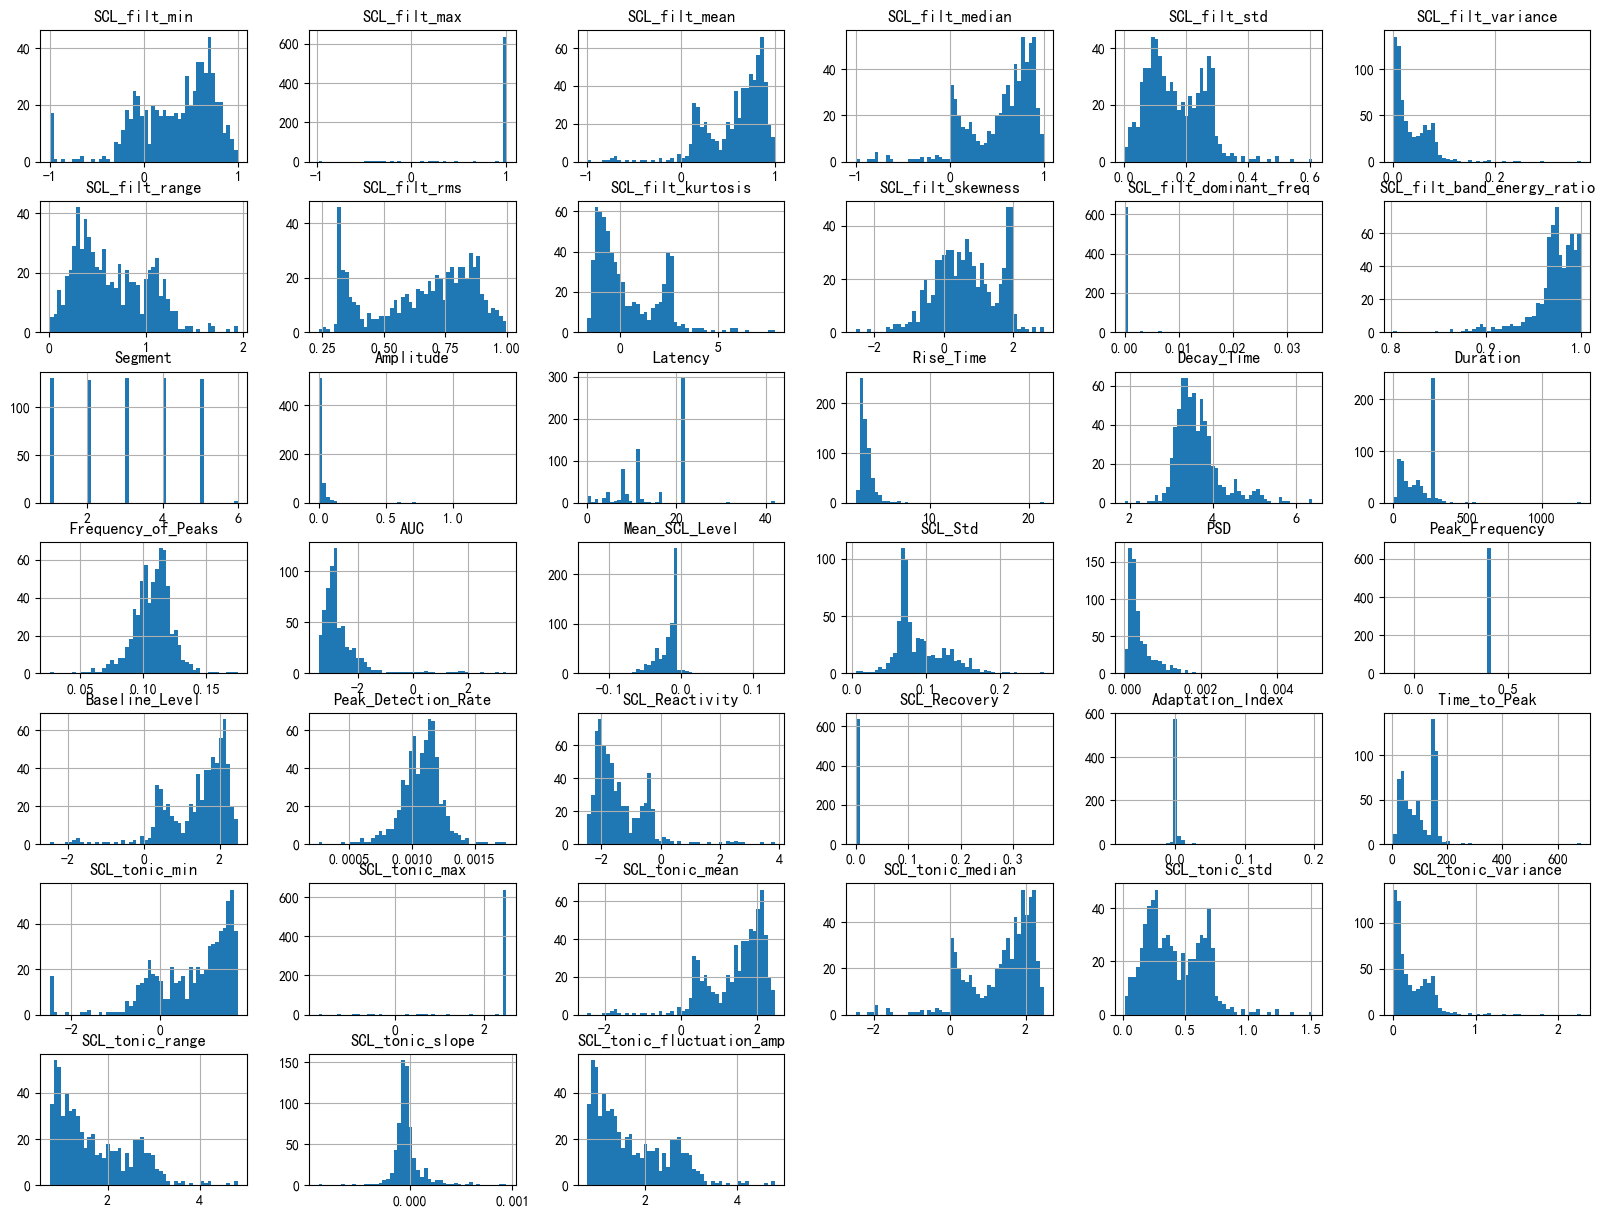

In [16]:
# plot the distribution of the features
df_scl.hist(bins=50, figsize=(20, 15))
plt.show()

In [17]:
# use spearman correlation to check the correlation between features

# missing file is 14030920_100Hz.csv
# drop the row with missing file
df_gsr = df_gsr[df_gsr['File'] != '14030920_100Hz.csv']
df_scl = df_scl[df_scl['File'] != '14030920_100Hz.csv']
df_scr = df_scr[df_scr['File'] != '14030920_100Hz.csv']

print(len(df_gsr['File'].tolist()))

df_gsr = df_gsr[(df_gsr['Segment'] != 2) & (df_gsr['Segment'] != 4)]
df_gsr['Segment'] = df_gsr['Segment'].apply(lambda x: x//2 + 1)



df_scl = df_scl[(df_scl['Segment'] != 2) & (df_scl['Segment'] != 4)]
df_scl['Segment'] = df_scl['Segment'].apply(lambda x: x//2 + 1)

df_scr = df_scr[(df_scr['Segment'] != 2) & (df_scr['Segment'] != 4)]
df_scr['Segment'] = df_scr['Segment'].apply(lambda x: x//2 + 1)


for i in df_gsr['Segment']:
    if i == 4:
        # 删除Segment为4的行
        df_gsr = df_gsr[df_gsr['Segment'] != 4]
    else:
        continue
    
for i in df_scl['Segment']:
    if i == 4:
        # 删除Segment为4的行
        df_scl = df_scl[df_scl['Segment'] != 4]
    else:
        continue
    
for i in df_scr['Segment']:
    if i == 4:
        # 删除Segment为4的行
        df_scr = df_scr[df_scr['Segment'] != 4]
    else:
        continue


# Remove 'File' and 'Segment' columns for correlation analysis
df_scl_corr = df_scl.drop(['File', 'Segment'], axis=1)
df_scr_corr = df_scr.drop(['File', 'Segment'], axis=1)
df_gsr_corr = df_gsr.drop(['File', 'Segment'], axis=1)




# drop the PSD, Cumulative Spectral Energy Distribution, and STFT Energy Spectrum columns
pattern = '|'.join(['PSD', 'Cumulative Spectral Energy Distribution', 'STFT Energy Spectrum'])
df_gsr_corr = df_gsr_corr.drop(df_gsr_corr.columns[df_gsr_corr.columns.str.contains(pattern, regex=True)], axis=1)



# 使用斯皮尔曼相关系数计算特征之间的相关性,主要针对非线性关系
corr_gsr_spear = df_gsr_corr.corr(method='spearman')
corr_scr_spear = df_scr_corr.corr(method='spearman')
corr_scl_spear = df_scl_corr.corr(method='spearman')


# 使用皮尔逊相关系数计算特征之间的相关性,主要针对线性关系
corr_gsr_pear = df_gsr_corr.corr(method='pearson')
corr_scr_pear = df_scr_corr.corr(method='pearson')
corr_scl_pear = df_scl_corr.corr(method='pearson')



# # plot the correlation matrix
# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_gsr, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix of GSR Features')

# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_scr, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix of SCR Features')

# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_scl, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix of SCL Features')


strong_corr_threshold = 0.8

# 将强相关的特征、中等相关的特征、弱相关的特征分别存储在不同的字典
strong_corr_gsr_spear = []
strong_corr_gsr_pear = []
weak_corr_gsr_spear = []
weak_corr_gsr_pear = []
for i in range(len(corr_gsr_spear.columns)):
    for j in range(i):
        if abs(corr_gsr_spear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_gsr_spear.append((corr_gsr_spear.columns[i], corr_gsr_spear.columns[j]))
        else:
            weak_corr_gsr_spear.append((corr_gsr_spear.columns[i], corr_gsr_spear.columns[j]))            
            
for i in range(len(corr_gsr_pear.columns)):
    for j in range(i):
        if abs(corr_gsr_pear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_gsr_pear.append((corr_gsr_pear.columns[i], corr_gsr_pear.columns[j]))
        else:
            weak_corr_gsr_pear.append((corr_gsr_pear.columns[i], corr_gsr_pear.columns[j]))
            
            
            
strong_corr_scr_spear = []
strong_corr_scr_pear = []

for i in range(len(corr_scr_spear.columns)):
    for j in range(i):
        if abs(corr_scr_spear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scr_spear.append((corr_scr_spear.columns[i], corr_scr_spear.columns[j]))
        else:
            continue
        
for i in range(len(corr_scr_pear.columns)):
    for j in range(i):
        if abs(corr_scr_pear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scr_pear.append((corr_scr_pear.columns[i], corr_scr_pear.columns[j]))
        else:
            continue
        
strong_corr_scl_spear = []
strong_corr_scl_pear = []

for i in range(len(corr_scl_spear.columns)):
    for j in range(i):
        if abs(corr_scl_spear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scl_spear.append((corr_scl_spear.columns[i], corr_scl_spear.columns[j]))
        else:
            continue
        
for i in range(len(corr_scl_pear.columns)):
    for j in range(i):
        if abs(corr_scl_pear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scl_pear.append((corr_scl_pear.columns[i], corr_scl_pear.columns[j]))
        else:
            continue
        
            
            




652


## analysis the corelation between the features and the target
- 1. concat the features and the target
- 2. use spearman correlation to analysis the corelation between the features and the target
- 3. use the hypothesis test to analysis the corelation between the features and the target
- 4. use the heatmap to show the corelation between the features and the target

In [18]:
df_target = pd.read_csv('data/new_table.csv')
df_target = df_target.iloc[:,:17]
df_target.drop('编号', axis=1, inplace=True)
print(df_target.columns)
#rename file to File
df_target.rename(columns={'file':'File'}, inplace=True)

# we concat df_target with df_gsr, df_scr, and df_scl on the 'File' column,df_target的File列是str类型，
#  df_gsr的File列是int类型,然后将df_target的File列的值是属于df_gsr的File列的值（因为df_gsr的File列有其他的值，所以是包含关系）
#  通过正则表达式匹配，将df_gsr的File列的值05010802_100Hz.csv 转换成 5010802 7位数字
import re
df_gsr['File'] = df_gsr['File'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_scl['File'] = df_scl['File'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_scr['File'] = df_scr['File'].apply(lambda x: int(re.findall(r'\d+', x)[0]))








Index(['file', 'P1', 'A1', 'D1', 'P2', 'A2', 'D2', 'P3', 'A3', 'D3', 'E', 'N',
       'P', 'age', 'sex', '香味'],
      dtype='object')


In [19]:
# 1. 首先将df_target的三个pad的值切分为三行
# 2. 然后将df_gsr, df_scr, df_scl的segment列，如果是2或者4的行删除


transorm_df = pd.DataFrame()
segments = [("P1", "A1", "D1"), ("P2", "A2", "D2"), ("P3", "A3", "D3")]

for i, (p_col,a_col,d_col) in enumerate(segments,start=1):
    temp_df = df_target[['File', p_col, a_col, d_col,'E','N','P','age','sex','香味']].copy()
    temp_df.columns = ['File', 'PP', 'A', 'D','E','N','P','age','sex','香味']
    temp_df['Segment'] = i
    transorm_df = pd.concat([transorm_df, temp_df], ignore_index=True)
    
# 我想把相同file的几行按顺序放在一起
transorm_df = transorm_df.sort_values(by=['File', 'Segment'], ascending=[True, True]).reset_index(drop=True)
# transorm_df.head(10)
transorm_df.head(10)

df_target_gsr = pd.merge(transorm_df, df_gsr, on=['File', 'Segment'], how='inner')
df_target_scr = pd.merge(transorm_df, df_scr, on=['File', 'Segment'], how='inner')
df_target_scl = pd.merge(transorm_df, df_scl, on=['File', 'Segment'], how='inner')





emotion_coordinates = {
    "喜悦": [2.77, 1.21, 1.42],
    "乐观": [2.48, 1.05, 1.75],
    "轻松": [2.19, -0.66, 1.05],
    "惊奇": [1.72, 1.71, 0.22],
    "温和": [1.57, -0.79, 0.38],
    "依赖": [0.39, -0.81, 1.48],
    "无聊": [-0.53, -1.25, -0.84],
    "悲伤": [-0.89, 0.17, -0.70],
    "恐惧": [-0.93, 1.30, -0.64],
    "焦虑": [-0.95, 0.32, -0.63],
    "藐视": [-1.58, 0.32, 1.02],
    "厌恶": [-1.80, 0.40, 0.67],
    "愤懑": [-1.98, 1.10, 0.60],
    "敌意": [-2.08, 1.00, 1.12]
}


# 现在我们通过PAD情感量表，增加一列情感类别'emotion'
def emotion_category(row):
    distances = {}
    for emotion, coordinates in emotion_coordinates.items():
        distance = np.linalg.norm(row[['PP', 'A', 'D']] - coordinates)
        distances[emotion] = distance
    return min(distances, key=distances.get)


df_target_gsr['emotion'] = df_target_gsr.apply(emotion_category, axis=1)
df_target_scr['emotion'] = df_target_scr.apply(emotion_category, axis=1)
df_target_scl['emotion'] = df_target_scl.apply(emotion_category, axis=1)
transorm_df['emotion'] = transorm_df.apply(emotion_category, axis=1)







#### 这一部分主要是拿到两种相关性分析的结果，找到出现频率最高的特征，然后存放到一个列表中，方便后续处理

In [20]:
            
# 现在拿到了强相关的特征，根据他们和目标变量的相关性删除两个特征中的一个

# # Get unique column names from correlation pairs
# unique_columns_pear = set()
# unique_columns_spear = set()

# for col1, col2 in strong_corr_gsr_pear:
# 	unique_columns_pear.add(col1)
# 	unique_columns_pear.add(col2)
 
 
# for col1, col2 in strong_corr_gsr_spear:
# 	unique_columns_spear.add(col1)
# 	unique_columns_spear.add(col2)
 
# File_corr = df_gsr['File'].tolist()
# File = df['File'].tolist()

# # 找到df_gsr_corr和df的补集
# File_corr = set(File_corr)
# File = set(File)
# print(File_corr - File)

# # Filter columns that exist in df_gsr
# unique_columns_pear = [col for col in unique_columns_pear if col in df_gsr.columns]
# unique_columns_spear = [col for col in unique_columns_spear if col in df_gsr.columns]


 
# 查看strong_corr_gsr_pear 和 strong_corr_gsr_spear中的哪些特征出现的最多，然后删除这些特征
# from collections import Counter
# all_features_pear_gsr = [feature for pair in strong_corr_gsr_pear for feature in pair]
# all_features_spear_gsr = [feature for pair in strong_corr_gsr_spear for feature in pair]

# all_features_pear_scr = [feature for pair in strong_corr_scr_pear for feature in pair]
# all_features_spear_scr = [feature for pair in strong_corr_scr_spear for feature in pair]

# all_features_pear_scl = [feature for pair in strong_corr_scl_pear for feature in pair]
# all_features_spear_scl = [feature for pair in strong_corr_scl_spear for feature in pair]

# counter_pear_gsr = Counter(all_features_pear_gsr).most_common(22)
# counter_spear_gsr = Counter(all_features_spear_gsr).most_common(20)
# counter_pear_scr = Counter(all_features_pear_scr).most_common(10)
# counter_spear_scr = Counter(all_features_spear_scr).most_common(8)
# counter_pear_scl = Counter(all_features_pear_scl).most_common(16)
# counter_spear_scl = Counter(all_features_spear_scl).most_common(16)

# # print(counter_spear)
# # print(counter_pear_scr)
# # print(counter_spear_scr)
# # print(counter_pear_scl)
# # print(counter_spear_scl)

# # 找到在counter_pear 和 counter_spear中同时出现最多的特征
# common_features_gsr = set([feature[0] for feature in counter_pear_gsr]).intersection(set([feature[0] for feature in counter_spear_gsr]))
# common_features_scr = set([feature[0] for feature in counter_pear_scr]).intersection(set([feature[0] for feature in counter_spear_scr]))
# common_features_scl = set([feature[0] for feature in counter_pear_scl]).intersection(set([feature[0] for feature in counter_spear_scl]))





#### 这一部分通过分析特征与目标之间的相关性和互信息，来选择特征。我发现相关性普遍很低缺乏线性关系，所以我选择了互信息来选择特征。然后前面拿到了高相关性特征，如果他们和目标之间的互信息也很高，那么我将保留这个特征

In [21]:
# Calculate correlation of unique columns with target variable
# corr_target_pear = df_gsr_corr.corrwith(df['PAD总分'], method='spearman')
# print(corr_target_pear)

from sklearn.feature_selection import mutual_info_classif


print(df_gsr_corr.columns.__len__())
print(df_scr_corr.columns.__len__())
print(df_scl_corr.columns.__len__())

# 计算互信息
mi_gsr = mutual_info_classif(df_gsr_corr, df_target_gsr['emotion'])
mi_series_gsr = pd.Series(mi_gsr, index=df_gsr_corr.columns)

mi_scr = mutual_info_classif(df_scr_corr, df_target_scr['emotion'])
mi_series_scr = pd.Series(mi_scr, index=df_scr_corr.columns)

mi_scl = mutual_info_classif(df_scl_corr, df_target_scl['emotion'])
mi_series_scl = pd.Series(mi_scl, index=df_scl_corr.columns)

print(f"mi_series_gsr is {mi_series_gsr}")

#通过平均值+k*标准差来选择阈值
threshold_gsr = mi_series_gsr.mean() + 1 * mi_series_gsr.std()
print("threshold is ", threshold_gsr)
# 选择互信息大于阈值的特征
selected_features = mi_series_gsr[mi_series_gsr > threshold_gsr].index

threshold_scr = mi_series_scr.mean() + 0.5 * mi_series_scr.std()
print("threshold is ", threshold_scr)
selected_features_scr = mi_series_scr[mi_series_scr > threshold_scr].index

threshold_scl = mi_series_scl.mean() + 0.5* mi_series_scl.std()
print("threshold is ", threshold_scl)
selected_features_scl = mi_series_scl[mi_series_scl > threshold_scl].index




# 在互信息大于阈值的特征中，找到强相关的特征，然后删除其中一个
  
for i in strong_corr_gsr_spear:
    if i[0] in selected_features and i[1] in selected_features:
        if mi_series_gsr[i[0]] > mi_series_gsr[i[1]]:
            selected_features = selected_features.drop(i[1])
        else:
            selected_features = selected_features.drop(i[0])
    else:
        continue
    
for i in strong_corr_gsr_pear:
    if i[0] in selected_features and i[1] in selected_features:
        if mi_series_gsr[i[0]] > mi_series_gsr[i[1]]:
            selected_features = selected_features.drop(i[1])
        else:
            selected_features = selected_features.drop(i[0])
    else:
        continue
    
for i in strong_corr_scr_spear:
    if i[0] in selected_features_scr and i[1] in selected_features_scr:
        if mi_series_scr[i[0]] > mi_series_scr[i[1]]:
            selected_features_scr = selected_features_scr.drop(i[1])
        else:
            selected_features_scr = selected_features_scr.drop(i[0])
    else:
        continue
        
for i in strong_corr_scr_pear:
    if i[0] in selected_features_scr and i[1] in selected_features_scr:
        if mi_series_scr[i[0]] > mi_series_scr[i[1]]:
            selected_features_scr = selected_features_scr.drop(i[1])
        else:
            selected_features_scr = selected_features_scr.drop(i[0])
    else:
        continue
    
for i in strong_corr_scl_spear:
    if i[0] in selected_features_scl and i[1] in selected_features_scl:
        if mi_series_scl[i[0]] > mi_series_scl[i[1]]:
            selected_features_scl = selected_features_scl.drop(i[1])
        else:
            selected_features_scl = selected_features_scl.drop(i[0])
    else:
        continue
        
for i in strong_corr_scl_pear:
    if i[0] in selected_features_scl and i[1] in selected_features_scl:
        if mi_series_scl[i[0]] > mi_series_scl[i[1]]:
            selected_features_scl = selected_features_scl.drop(i[1])
        else:
            selected_features_scl = selected_features_scl.drop(i[0])
    else:
        continue
    
    
    
print(f"the selected features are {selected_features}")
print(f"the selected features are {selected_features_scr}")
print(f"the selected features are {selected_features_scl}")
        

        



68
29
38
mi_series_gsr is Mean                              0.055486
Median                            0.043601
Maximum                           0.038313
Minimum                           0.039641
Peak-to-Peak                      0.000000
                                    ...   
Instantaneous Phase Mean          0.052958
Instantaneous Phase Std           0.099593
Number of Frequency Components    0.006664
Teager Energy Operator Mean       0.034613
Teager Energy Operator Std        0.048743
Length: 68, dtype: float64
threshold is  0.04659397286201866
threshold is  0.05184332175349971
threshold is  0.06671086835258279
the selected features are Index(['Number of Peaks', 'Spectral Centroid', 'Wavelet Entropy',
       'Lempel-Ziv Complexity', '75th Percentile',
       'Standard Deviation of Spectral Amplitude', 'Instantaneous Phase Std'],
      dtype='object')
the selected features are Index(['SCR_riseTime_min', 'SCR_latency_mean', 'SCR_latency_std'], dtype='object')
the selected featur

In [22]:

df_gsr_corr = df_gsr_corr[selected_features]
df_scr_corr = df_scr_corr[selected_features_scr]
df_scl_corr = df_scl_corr[selected_features_scl]

## 特征和目标变量之间的解释
- 1. 首先对这几个特征和PAD进行描述性统计，并且按照香味、人格分组进行可视化。初步查看这几个特征和PAD之间的关系，是否存在直观上的均值差异
- 2. 使用统计学玩。
    - 验证不同香味对情绪和压力指标（GSR、PAD）的影响是否显著
    - 探讨这一影响是否会因人格维度（P、E、N）的差异而产生分层效应
    - 进一步分析 GSR 特征与 PAD 量表之间的关系
    - 重复测量方差分析 (Repeated Measures ANOVA) 或线性混合效应模型 (Linear Mixed-Effects Model)
- 3. 使用机器学习模型
    - 聚类分析
    - 随机森林分类
    - Xgboost回归然后查看特征重要性
    - 多任务学习或序列模型。如果采集到的 GSR 是时间序列，可以考虑使用 RNN、LSTM 或 Transformer 等网络，结合香味切换时刻，来预测 PAD 的波动趋势。


In [23]:
# ## 组成一个大表，把df_gsr_corr, df_scr_corr, df_scl_corr, df_target合并在一起
# df_gsr_corr['File'] = df_gsr['File']
# df_scr_corr['File'] = df_scr['File']
# df_scl_corr['File'] = df_scl['File']


# df_gsr_corr['Segment'] = df_gsr['Segment']
# df_scr_corr['Segment'] = df_scr['Segment']
# df_scl_corr['Segment'] = df_scl['Segment']

# df = pd.merge(df_gsr_corr, df_scr_corr, on=['File','Segment'], how='inner')
# df = pd.merge(df, df_scl_corr, on=['File','Segment'], how='inner')
# df = pd.merge(df, transorm_df, on=['File','Segment'], how='inner')

# df.head()
# df.to_csv('data/all_features.csv', index=False)



In [24]:
# df_all  = pd.read_csv('data/all_features.csv')


# ## 指定一个映射将人格E,N,P映射到类别高得分，中等得分，低得分，假设某个维度的常模均值为M，标准差为SD，则划分可以如下进行：
# # 高分: 得分 > M + 1SD
# # 中等分: M - 1SD ≤ 得分 ≤ M + 1SD
# # 低分: 得分 < M - 1SD


# def map_personality(df, dimensions):
#     for dimension in dimensions:
#         mean = df[dimension].mean()
#         std = df[dimension].std()
#         df[dimension] = df[dimension].apply(lambda x: 'high' if x > mean + std else 'low' if x < mean - std else 'medium')
#     return df

# df_all = map_personality(df_all, ['E', 'N', 'P'])
# df_all.to_csv('data/all_features_mapped.csv', index=False)


箱线图：GSR特征和情绪类别，按照香味条件分组：


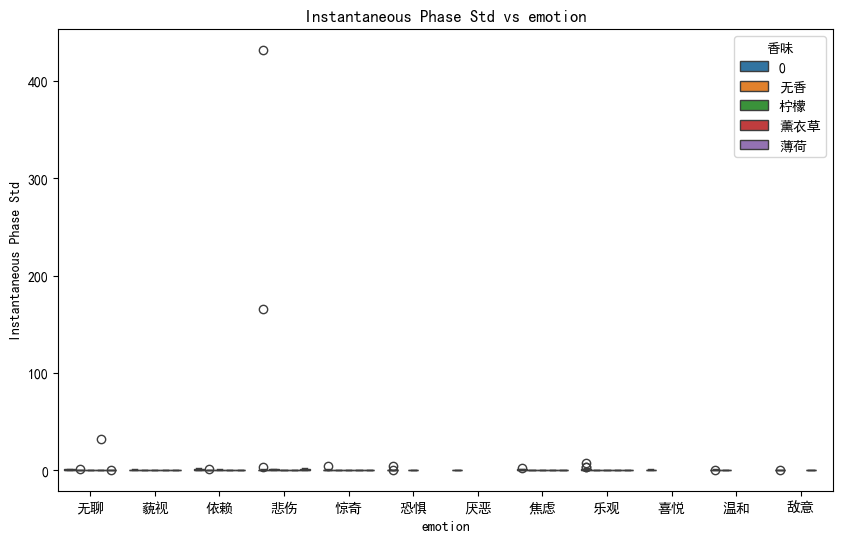

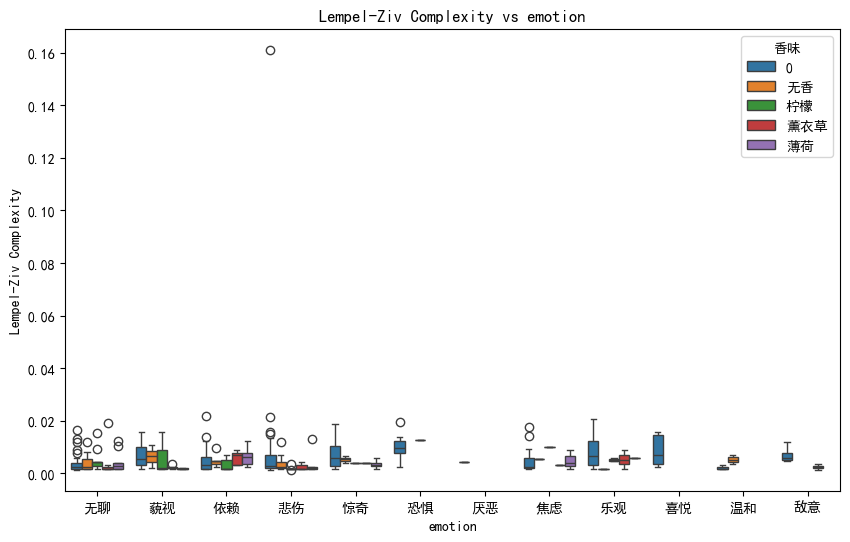

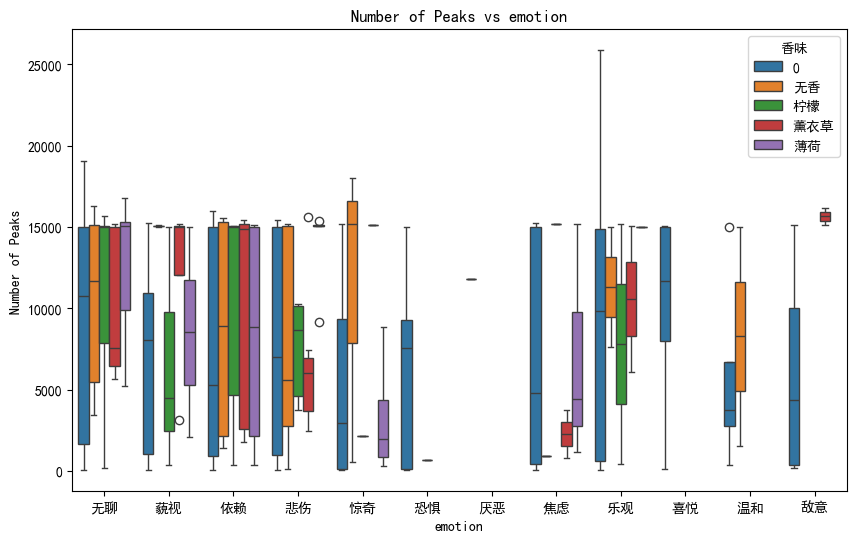

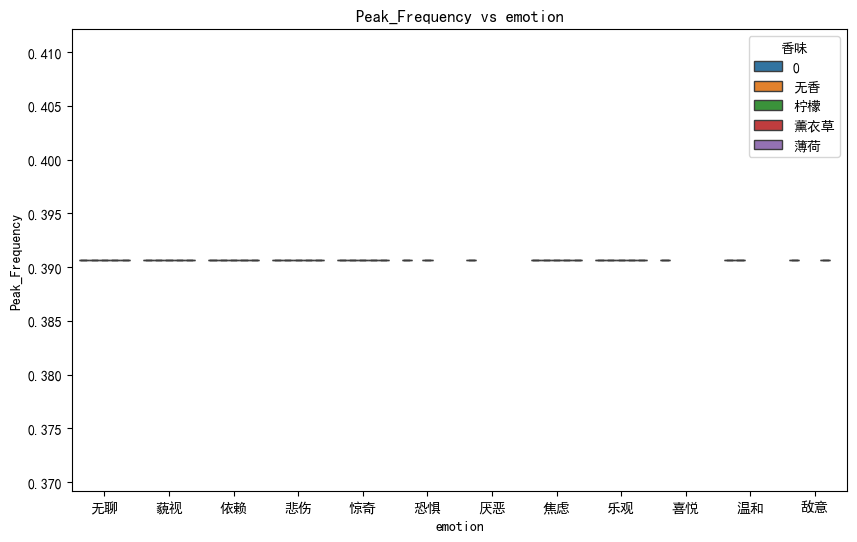

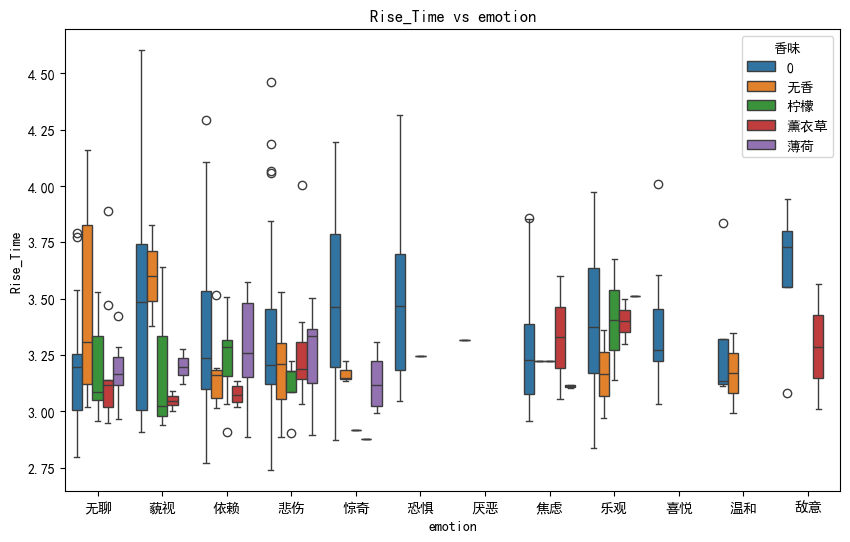

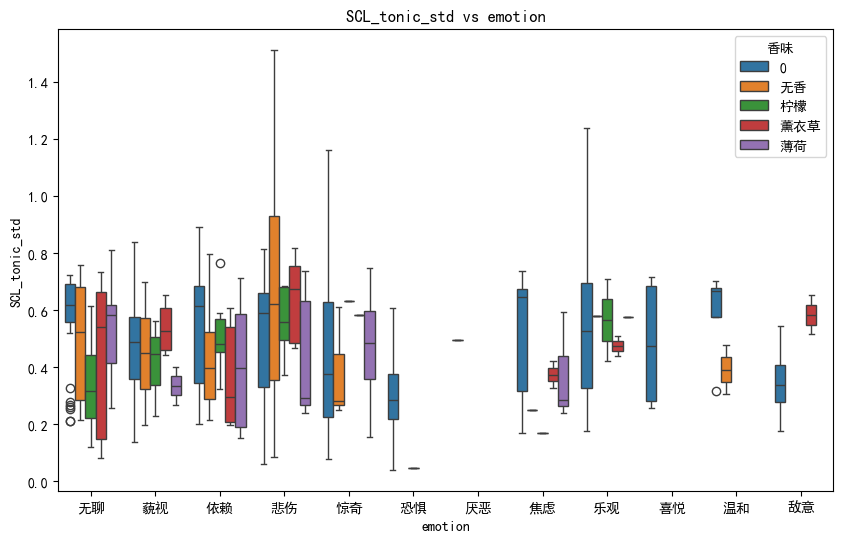

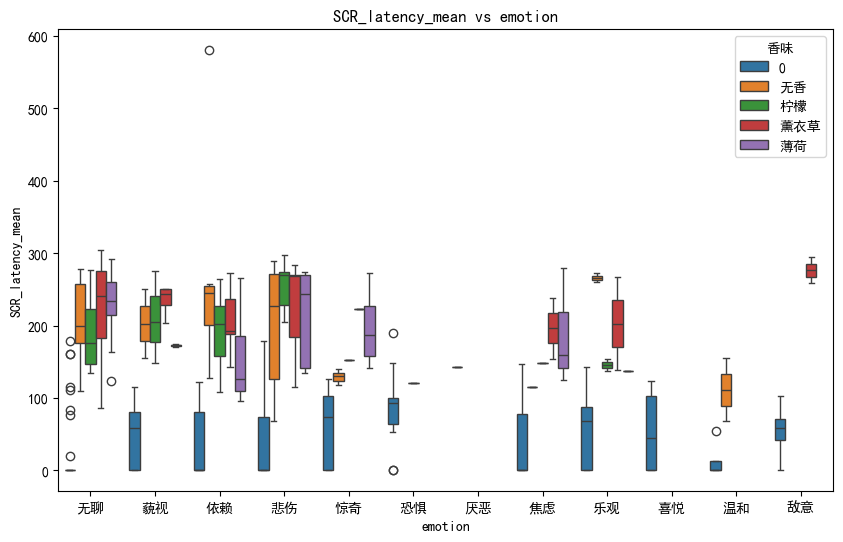

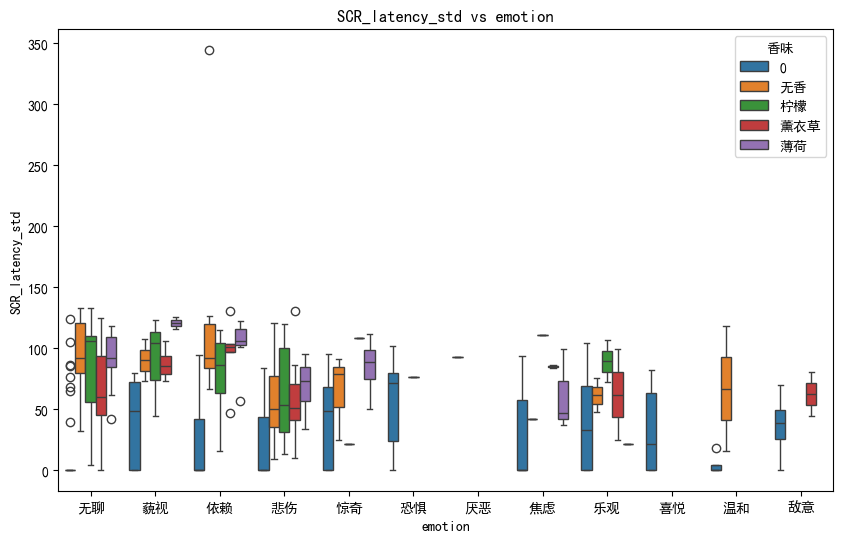

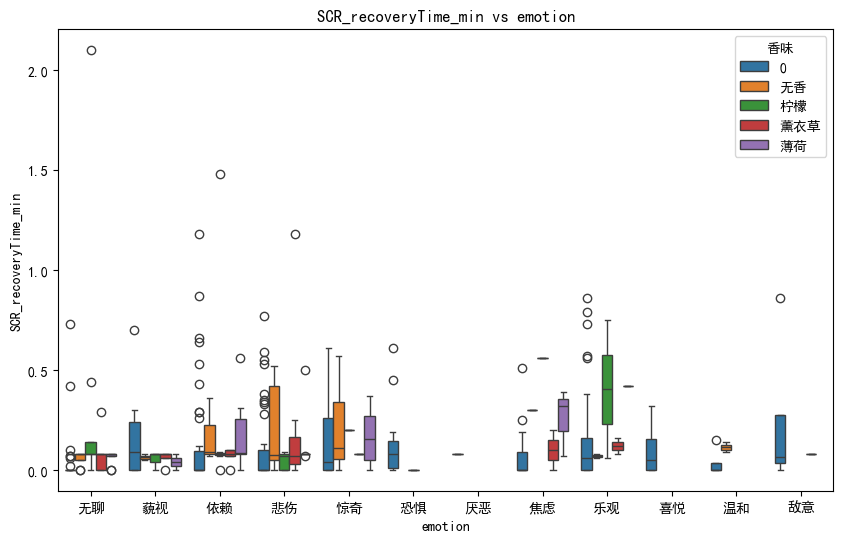

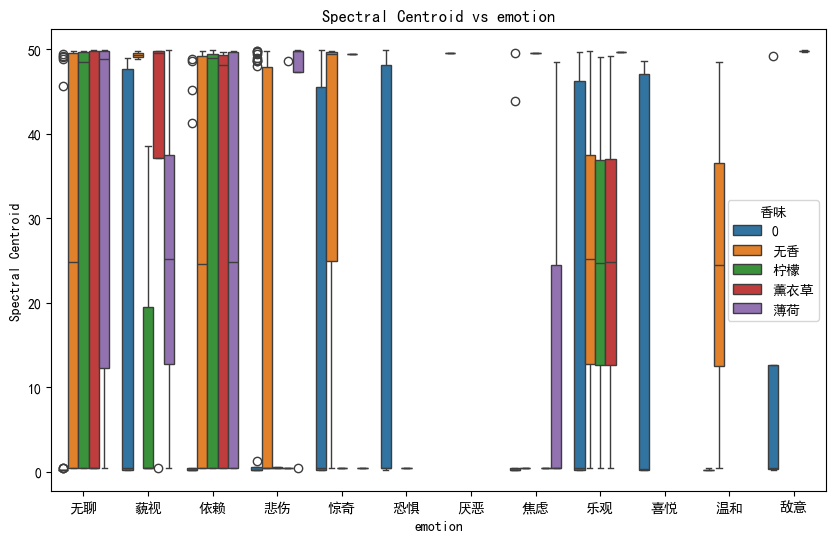

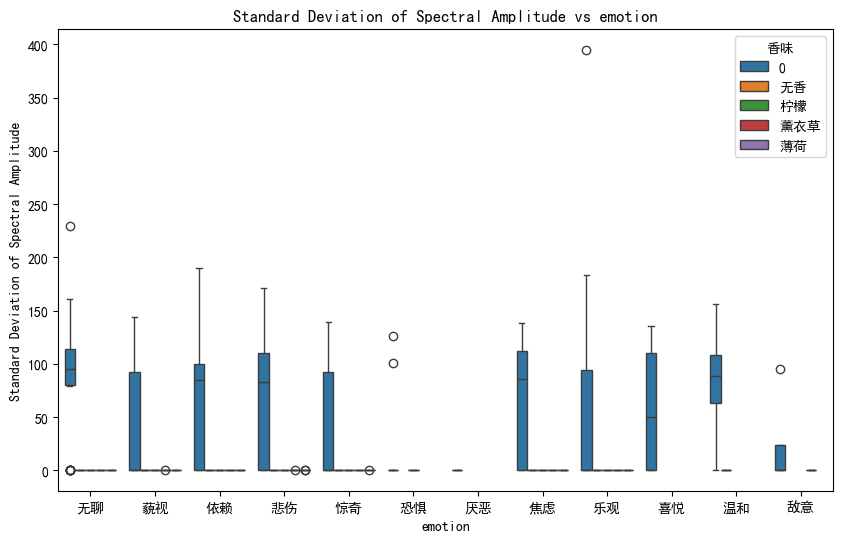

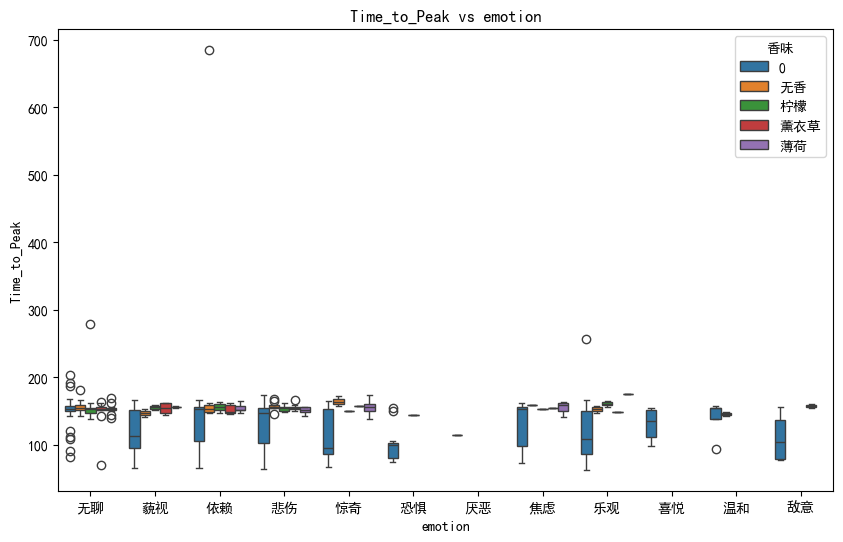

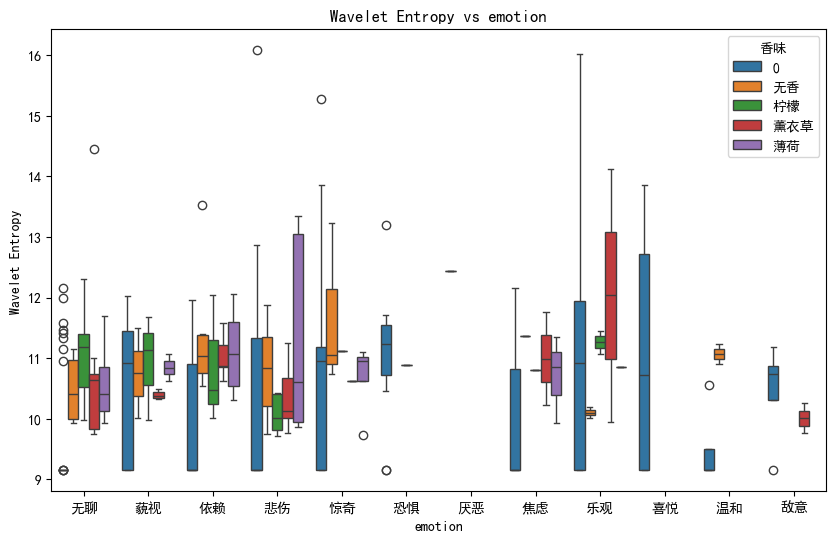

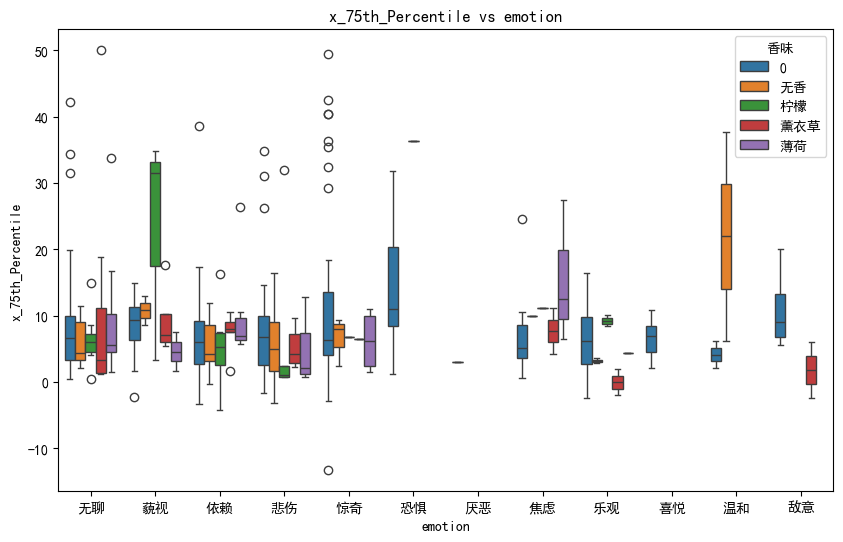

In [25]:
# 可视化一下new_table.csv中的数据
df_result =pd.read_csv('data/all_features_mapped.csv')
# 设置字体为 SimHei（黑体），确保系统中已安装该字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中存在的中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号


# feature是除了emotion和file和segment之外的所有列
features = df_result.columns.difference(['emotion', 'File', 'Segment'])
target = df_result['emotion']


#对 GSR 特征和 情绪类别做描述性统计（均值、标准差、分位数等），并按香味条件、人格分组进行箱线图可视化。
gsr_feature =  df_result.columns.difference(['emotion', 'File', 'Segment', 'PP', 'A', 'D','E','N','P','age','sex','香味'])
# print('箱线图：GSR特征和情绪类别，按照人格分组：')

# for feature in gsr_feature:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='emotion', y=feature, data=df_result, hue='E')
#     plt.title(f'{feature} vs emotion')
#     plt.show()
    
print('箱线图：GSR特征和情绪类别，按照香味条件分组：')
for feature in gsr_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y=feature, data=df_result, hue='香味')
    plt.title(f'{feature} vs emotion')
    plt.show()

Instantaneous Phase Std is not normally distributed
the transformed Instantaneous Phase Std first 5 values: 0    0.583404
1    0.233869
2    0.195441
3    0.577167
4    0.197152
Name: Instantaneous Phase Std, dtype: float64
the feature Instantaneous Phase Std first 5 values: [0.76756231 0.23891302 0.19128211 0.75642015 0.19336366]


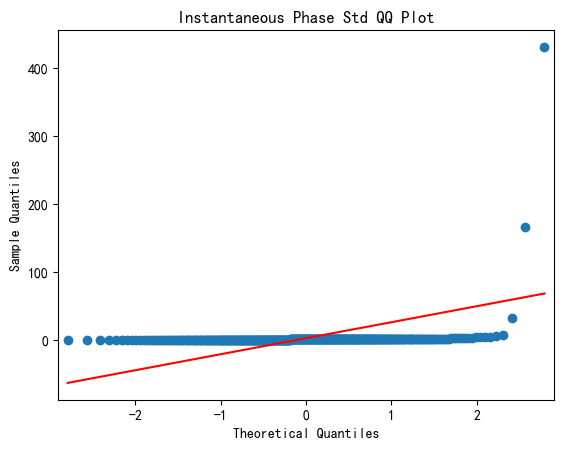

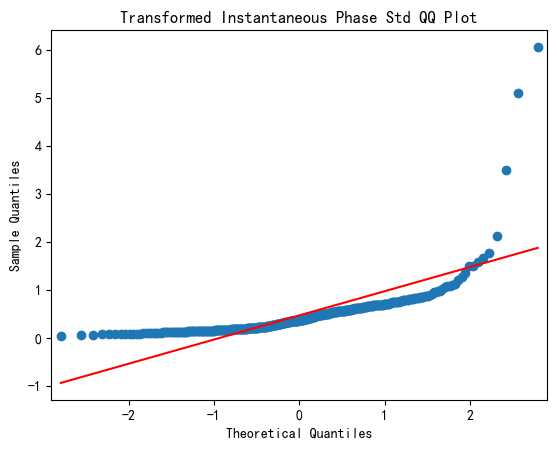

Lempel-Ziv Complexity is not normally distributed
the transformed Lempel-Ziv Complexity first 5 values: 0    0.006012
1    0.016714
2    0.010618
3    0.004448
4    0.016761
Name: Lempel-Ziv Complexity, dtype: float64
the feature Lempel-Ziv Complexity first 5 values: [0.0049598  0.0157839  0.00960453 0.00338779 0.01583179]


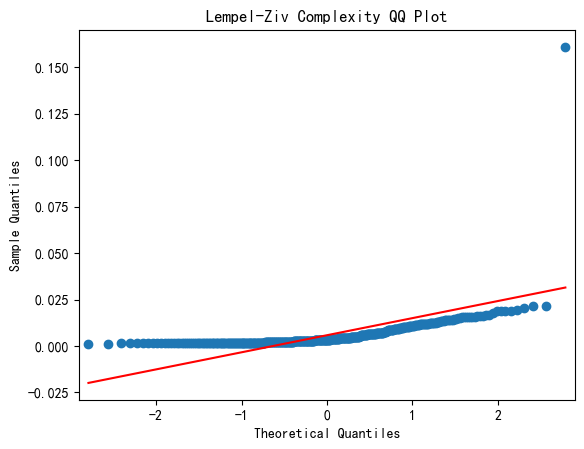

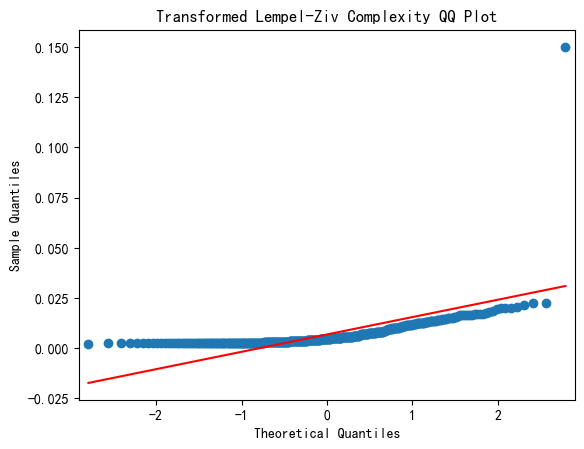

Number of Peaks is not normally distributed
the transformed Number of Peaks first 5 values: 0    9.616938
1    9.349841
2    9.652652
3    9.644069
4    9.619731
Name: Number of Peaks, dtype: float64
the feature Number of Peaks first 5 values: [14991 11471 15537 15404 15033]


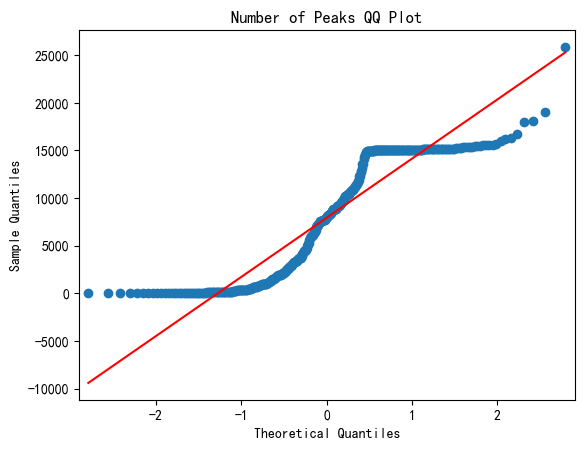

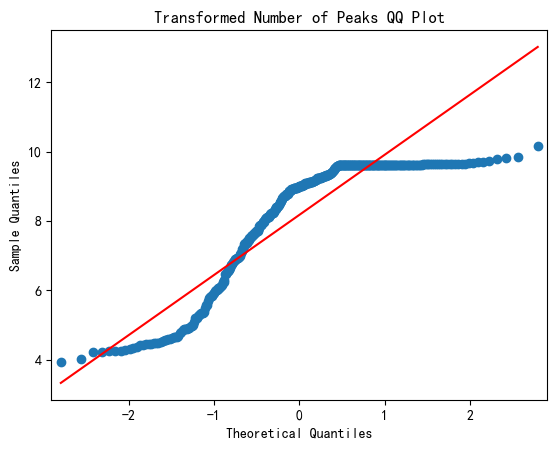

Peak_Frequency is normally distributed
Rise_Time is not normally distributed
the transformed Rise_Time first 5 values: 0    1.914193
1    2.012578
2    1.981716
3    1.931900
4    1.928972
Name: Rise_Time, dtype: float64
the feature Rise_Time first 5 values: [3.04322581 3.74434783 3.51694444 3.164375   3.14419355]


e:\applist\miniconda\envs\sklearn\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


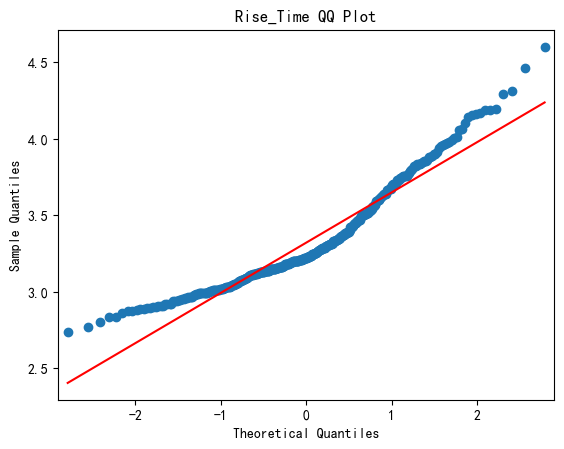

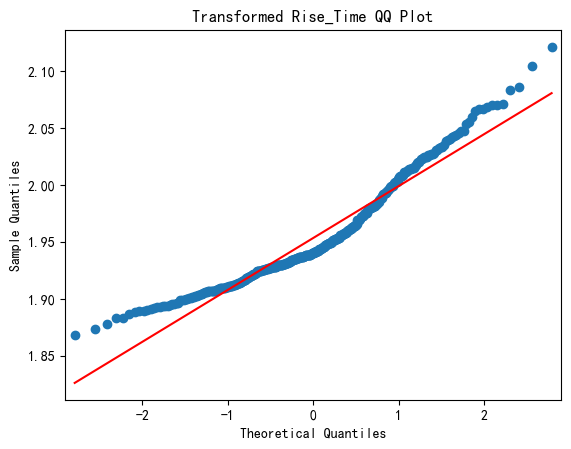

SCL_tonic_std is not normally distributed
the transformed SCL_tonic_std first 5 values: 0    0.504423
1    0.330640
2    0.272066
3    0.509861
4    0.279538
Name: SCL_tonic_std, dtype: float64
the feature SCL_tonic_std first 5 values: [0.61854176 0.35437069 0.27518514 0.62757039 0.2850304 ]


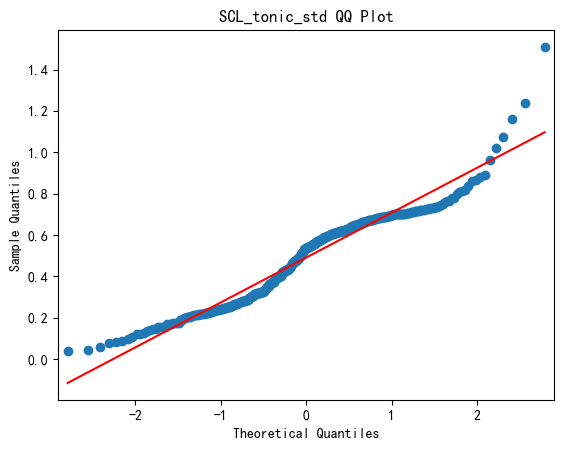

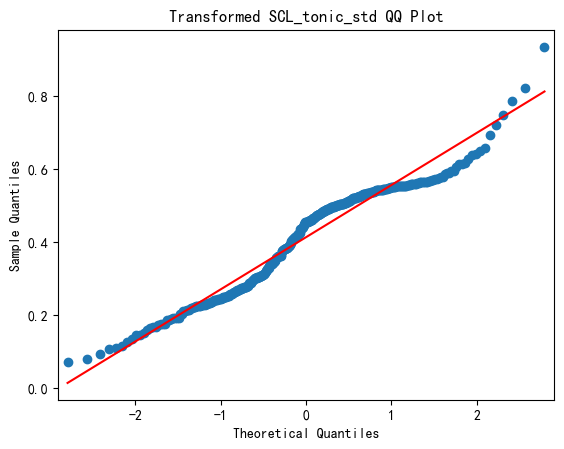

SCR_latency_mean is not normally distributed
the transformed SCR_latency_mean first 5 values: 0    0.000000
1    4.213870
2    5.243679
3    0.000000
4    4.754987
Name: SCR_latency_mean, dtype: float64
the feature SCR_latency_mean first 5 values: [  0.          66.61769231 188.36545455   0.         115.16216216]


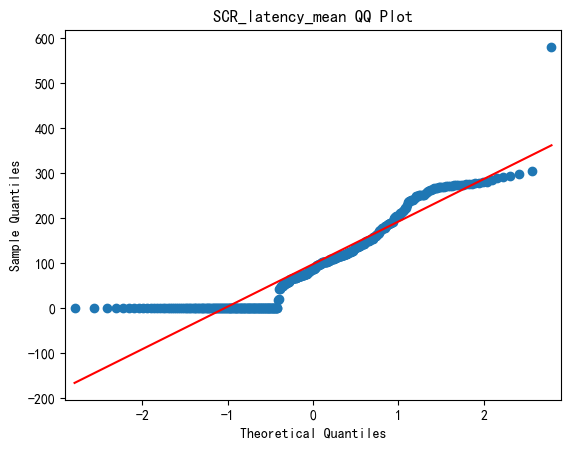

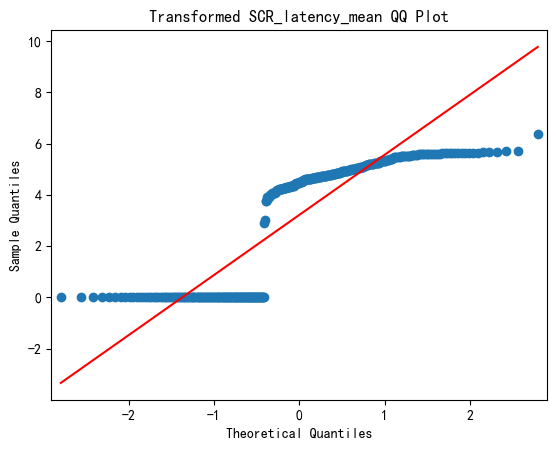

SCR_latency_std is not normally distributed
the transformed SCR_latency_std first 5 values: 0    0.000000
1    4.209667
2    4.845847
3    0.000000
4    4.411975
Name: SCR_latency_std, dtype: float64
the feature SCR_latency_std first 5 values: [  0.          66.33408489 126.21103895   0.          81.43210756]


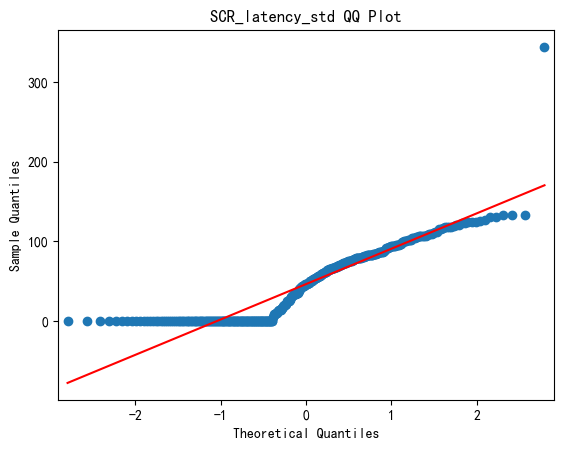

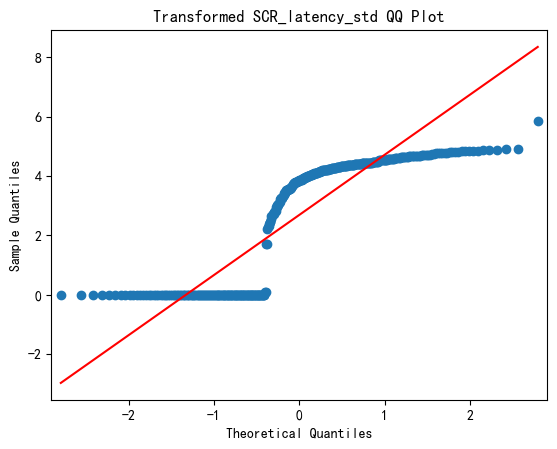

SCR_recoveryTime_min is not normally distributed
the transformed SCR_recoveryTime_min first 5 values: 0    0.000000
1    0.190620
2    0.095310
3    0.000000
4    0.300105
Name: SCR_recoveryTime_min, dtype: float64
the feature SCR_recoveryTime_min first 5 values: [0.   0.21 0.1  0.   0.35]


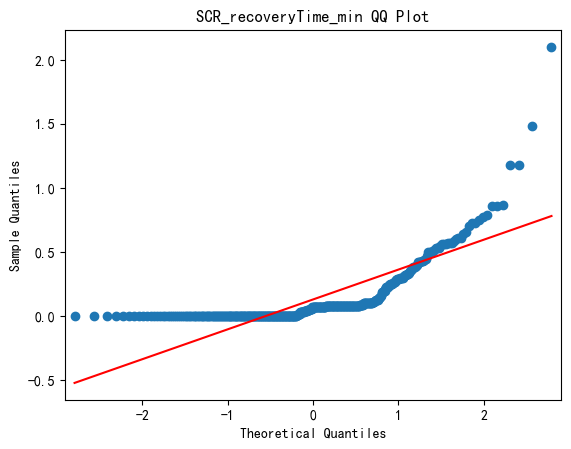

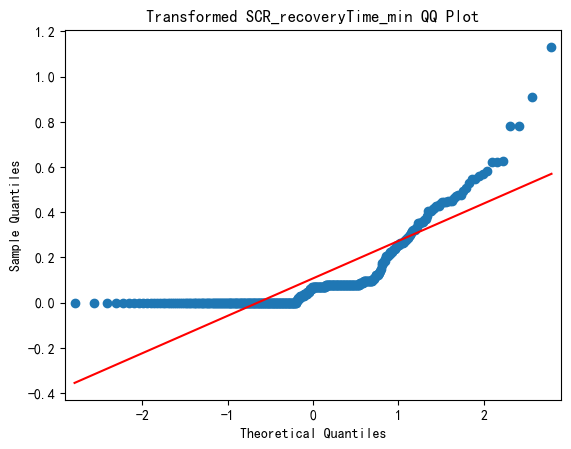

Spectral Centroid is not normally distributed
the transformed Spectral Centroid first 5 values: 0    0.285342
1    3.839674
2    3.909529
3    0.269004
4    3.895091
Name: Spectral Centroid, dtype: float64
the feature Spectral Centroid first 5 values: [ 0.20010032 45.38019728 48.74531687  0.17854332 48.03042953]


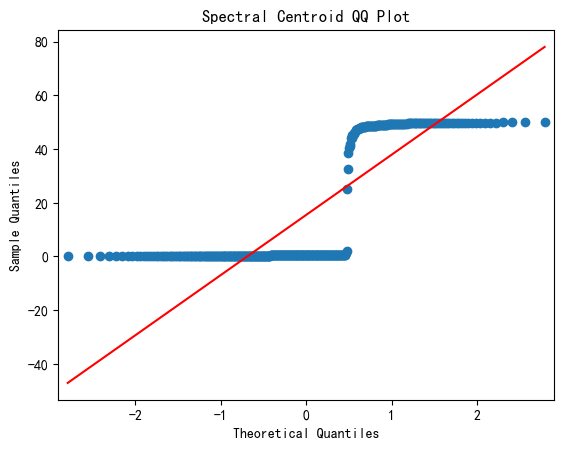

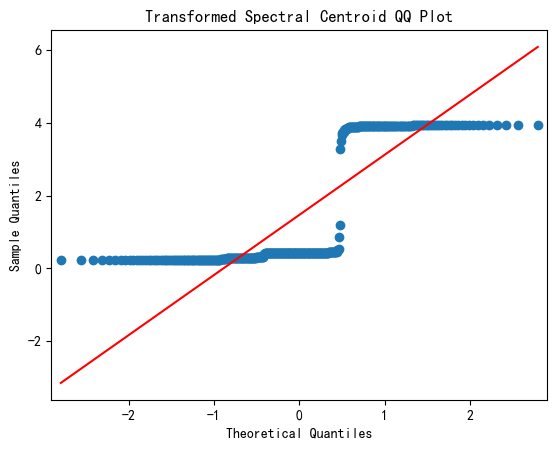

Standard Deviation of Spectral Amplitude is not normally distributed
the transformed Standard Deviation of Spectral Amplitude first 5 values: 0    4.783772
1    0.154904
2    0.154278
3    5.151116
4    0.154316
Name: Standard Deviation of Spectral Amplitude, dtype: float64
the feature Standard Deviation of Spectral Amplitude first 5 values: [1.18554510e+02 1.67545872e-01 1.66815033e-01 1.71624096e+02
 1.66858970e-01]


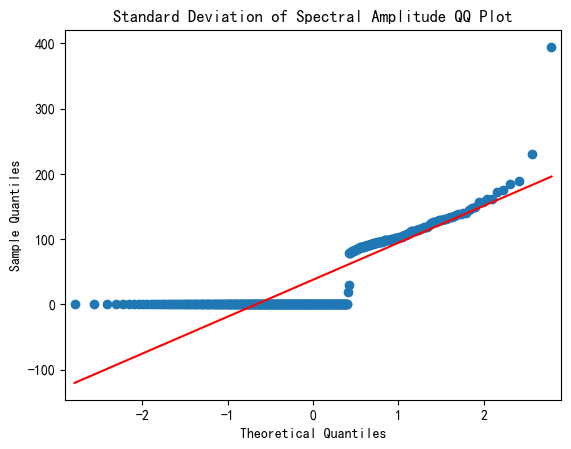

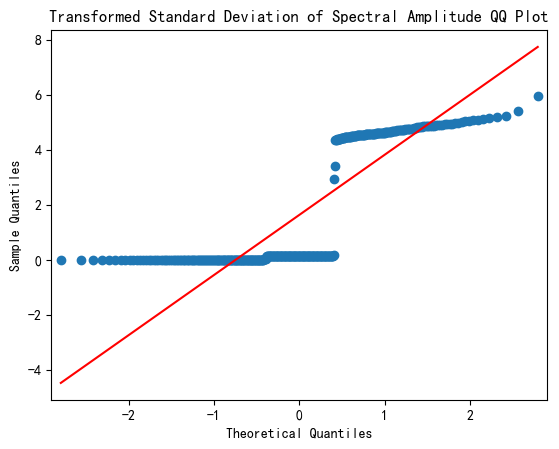

Time_to_Peak is not normally distributed
the transformed Time_to_Peak first 5 values: 0    5.352509
1    5.111076
2    5.349168
3    5.378784
4    5.469963
Name: Time_to_Peak, dtype: float64
the feature Time_to_Peak first 5 values: [148.0187097 102.73      147.3144444 153.6396875 174.3325806]


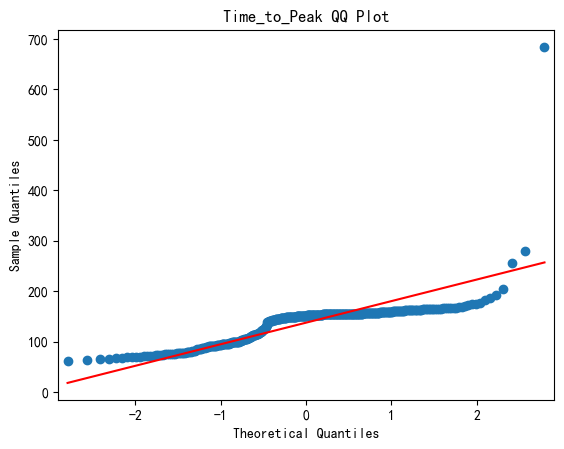

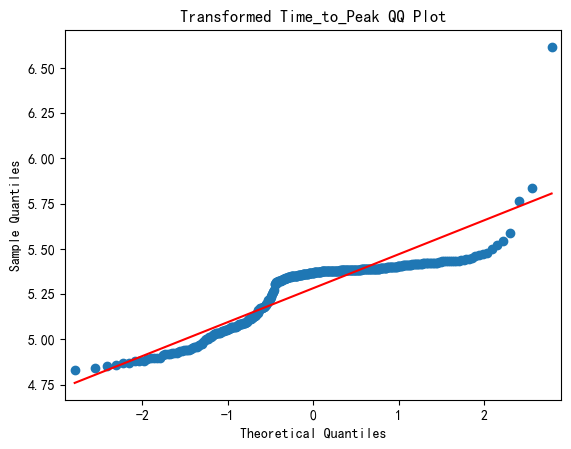

Wavelet Entropy is not normally distributed
the transformed Wavelet Entropy first 5 values: 0    2.959727
1    3.098381
2    3.065896
3    2.959745
4    3.111408
Name: Wavelet Entropy, dtype: float64
the feature Wavelet Entropy first 5 values: [ 9.14822493 12.01756492 11.30919043  9.14857432 12.30816459]


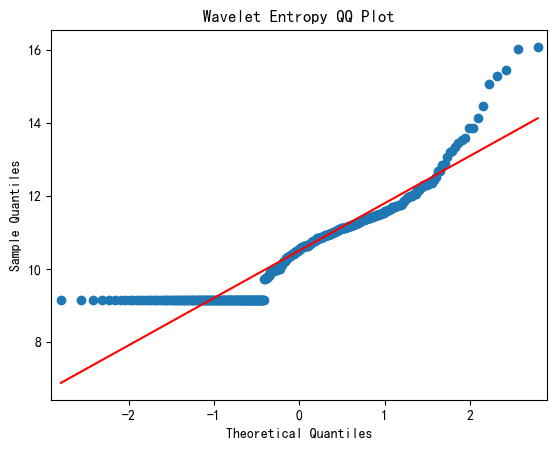

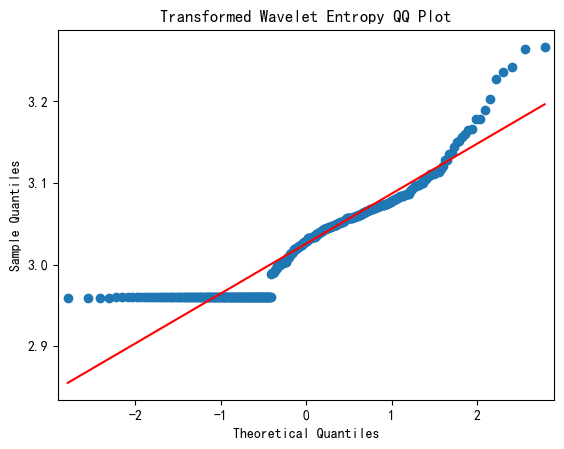

x_75th_Percentile is not normally distributed
the transformed x_75th_Percentile first 5 values: 0    3.100113
1    3.261630
2    3.186375
3    3.054109
4    3.230555
Name: x_75th_Percentile, dtype: float64
the feature x_75th_Percentile first 5 values: [ 7.84227945 11.73385521  9.84237557  6.84410731 10.93551567]


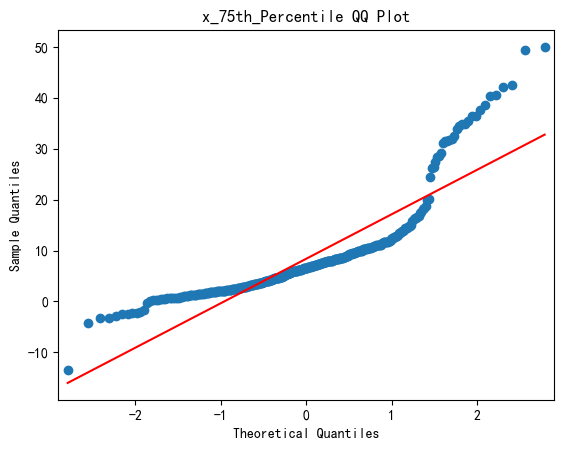

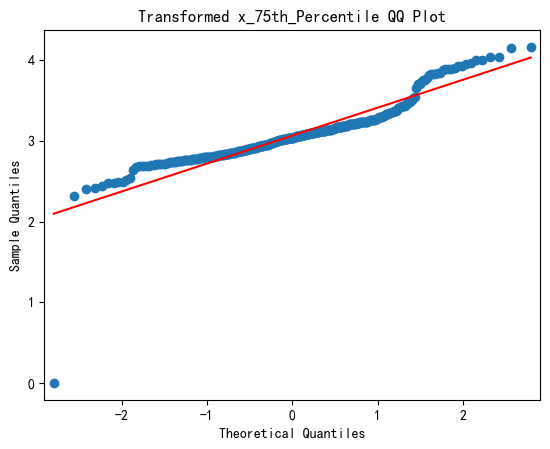

In [26]:
# 2. 验证第一个结论：不同人格特质的人在不同香味条件下，其GSR特征会产生显著波动。

## 首先需要检查GSR特征是否符合正态分布，如果不符合正态分布，需要进行正态化处理
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import yeojohnson
import scipy.stats as stats


# 将转化前后的正态性检验结果打印出来，并且使用QQ图对比转化前后的分布，同一个数据的放在一个大图里面
for feature in gsr_feature:
    # Check if the feature is normally distributed
    stat, p = shapiro(df_result[feature])
    if p < 0.05:
        print(f'{feature} is not normally distributed')
        # Perform Box-Cox transformation
        # transformed, _ = yeojohnson(df_result[feature])
        offset = np.abs(np.min(df_result[feature])) + 1
        transformed = np.log(df_result[feature]+offset)
        # Perform Shapiro-Wilk test on transformed data
        print(f"the transformed {feature} first 5 values: {transformed[:5]}")
        print(f"the feature {feature} first 5 values: {df_result[feature].head().values}")        
        # Plot QQ plot
        fig = sm.qqplot(df_result[feature], line='s')
        plt.title(f'{feature} QQ Plot')
        plt.show()
        fig = sm.qqplot(transformed,line='s')
        plt.title(f'Transformed {feature} QQ Plot')
        plt.show()

    else:
        print(f'{feature} is normally distributed')

    

In [28]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder


def rename_columns_without_spaces(df):
    # 创建重命名映射字典
    rename_dict = {
        col: col.replace(' ', '_') 
        for col in df.columns 
        if ' ' in col
    }
    
    # 如果有需要重命名的列，则进行重命名
    if rename_dict:
        df = df.rename(columns=rename_dict)
        print("重命名的列:", rename_dict)
    
    return df

# 使用示例
df_result = rename_columns_without_spaces(df_result)
gsr_feature =  df_result.columns.difference(['emotion', 'File', 'Segment', 'PP', 'A', 'D','E','N','P','age','sex','香味'])

# Create label encoder for emotion
le = LabelEncoder()
df_result['emotion_encoded'] = le.fit_transform(df_result['emotion'])

# 使用混合效应模型，固定效应是：香味和人格，检验GSR特征和不同香味和人格特质的情绪类别之间的关系
formular = 'emotion_encoded ~ E + N + P + 香味 + (1|File) + (1|Segment)'

for feature in gsr_feature:
    print(f'Feature: {feature}')
    # Add the feature to the formula
    current_formula = f'{feature} ~ E + N + P + 香味 + (1|File) + (1|Segment)'
    model = smf.mixedlm(current_formula, df_result, groups='香味')
    result = model.fit()
    print(result.summary())
    break

Feature: Instantaneous_Phase_Std
                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Instantaneous_Phase_Std
No. Observations: 383     Method:             REML                   
No. Groups:       5       Scale:              559.4708               
Min. group size:  29      Log-Likelihood:     -1739.2348             
Max. group size:  259     Converged:          Yes                    
Mean group size:  76.6                                               
----------------------------------------------------------------------
                Coef.      Std.Err.       z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept       -2.992          24.463  -0.122  0.903  -50.938  44.954
E[T.low]         1.916           4.147   0.462  0.644   -6.212  10.044
E[T.medium]      2.393           3.180   0.753  0.452   -3.838   8.625
N[T.low]         7.843           3.769   2.081  0.037    0.456  15.

### 聚类分析
- 先使用K-prototypes先把人根据人格，性别，年龄先分群，然后在每个簇里面找到香味-情绪的推荐规则。最后然后使用xgboost分类进行簇的推荐
- 聚类的时候首先通过cost函数找到最佳的簇数，然后再进行聚类
- 然后需要对每个簇进行推荐规则的制定，这里可以使用频数统计，相关性分析，显著性分析、然后将香味进行映射到情绪上

In [11]:
df_cluster = pd.read_csv('data/all_features.csv')
df_cluster = df_cluster[['PP','A','D','E', 'N', 'P', 'sex','香味','emotion']]
#  删除香味那一列为o的行
df_cluster = df_cluster[df_cluster['香味'] != '0']
cluster_feature= ['E','N','P','sex']
df_cluster_cluster = df_cluster[cluster_feature]



# 导入DBSCAN 和 K-prototypes 算法
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中存在的中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号



# # 先使用K-prototypes算法
# k_values = range(3, 10)  # 这里示例 k=3 到 k=8
# costs = []

# for k in k_values:
#     # 每次循环都建一个 KPrototypes 实例
#     kp = KPrototypes(n_clusters=k, 
#                      init='Cao', 
#                      n_init=10,   # 多次随机初始化, 减少局部最优
#                      verbose=0)  # 设置为1可以观察详细迭代过程
    
#     # 注意: categorical=[3] 是指第3列(从0开始算)为分类列
#     # 如果实际数据结构不同, 请修改索引
#     cluster_labels = kp.fit_predict(df_cluster_cluster, categorical=[3])
    
#     # kp.cost_ 就是此轮聚类的代价(越小越好, 类似 "簇内距离平方和")
#     cost_value = kp.cost_
#     costs.append(cost_value)
    
#     print(f"k={k}, cost_={cost_value}")

# # 画出代价随着k值的变化
# plt.figure(figsize=(6,4))
# plt.plot(k_values, costs, marker='o')
# plt.title("Elbow Method using KPrototypes cost_")
# plt.xlabel("Number of clusters k")
# plt.ylabel("cost_ (lower is better)")
# plt.show()






# 从上图可以看出，k=6是一个比较好的选择
# 画出聚类结果
kp = KPrototypes(n_clusters=6, init='Cao', n_init=10, verbose=0)
cluster_labels = kp.fit_predict(df_cluster_cluster, categorical=[3])
df_cluster['cluster_label'] = cluster_labels
df_cluster_cluster['cluster_label'] = cluster_labels

import plotly.express as px

fig = px.scatter_3d(
    df_cluster_cluster,
    x='E',
    y='N',
    z='P',
    color='cluster_label',  # 用聚类标签着色
    title='3D Scatter with Clusters (color) and Sex (symbol)'
)
# fig.show()

fig.update_layout(
    width=1000,  # 图形宽度（像素）
    height=800,  # 图形高度（像素）
    title_font=dict(size=20),  # 调整标题字体大小
)

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter







C:\Users\16972\AppData\Local\Temp\ipykernel_13440\1181248528.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_cluster['cluster_label'] = cluster_labels


- cluster 0: 外向性 (E): 平均值为51.56，处于中等偏上的水平；神经质 (N): 平均值为71.67，显著偏高，表明此簇个体情绪波动较大，容易感到焦虑或压力。；精神质 (P): 平均值为56.70，处于中等偏上的水平，显示出适度的侵略性和竞争性。
--------> 簇 0 的个体以女性为主，她们在外向性上表现中等，可能并非极度外向或内向。然而，她们的神经质得分非常高，表明这个群体倾向于情绪化、焦虑。精神质得分中等偏高，可能意味着她们中一部分人可能相对独立自主，但整体而言，高神经质是这个簇的显著特征。可以称之为 “高焦虑型女性群体”。
- cluster 1: 外向性 (E): 平均值为54.40，处于中等水平；神经质 (N): 神经质 (N): 平均值为54.69，接近中性。；精神质 (P): 平均值为61.44，较高，显示出较强的竞争性和决断力。
--------> 簇 1 的个体也以女性为主，她们的外向性和神经质都处于中等水平，意味着情绪相对稳定，社交倾向也适中。但值得注意的是，她们的精神质得分非常高，这表明这个群体可能更具有独立性、冒险精神，甚至可能表现出一些不循规蹈矩的行为。考虑到性别分布，可以理解为 “独立自主型女性群体”，高精神质在这里可能更多地体现为独立和自信，而非负面特征。
- cluster 2: 外向性 (E): 平均值为64.17，较高，表明高度外向 ；神经质 (N): 平均值为64.26，较高，显示出情绪波动较大。；精神质 (P): 平均值为45.87，略低，体现出较为温和的性格。
--------> 簇 2 的个体以男性为主，他们的外向性得分非常高，表明这是一个非常外向、善于社交、充满活力的群体。神经质得分中等偏高，意味着他们可能偶尔会感到压力或情绪波动，但整体上仍较为稳定。精神质得分很低，说明他们通常比较有同情心、合作、遵守规则。可以称之为 “外向社交型男性群体”。
- cluster 3: 外向性 (E): 平均值为31.05，较低，表现出内向倾向。；神经质 (N): 平均值为65.11，较高，情绪波动显著。；精神质 (P): 平均值为58.55，处于中等偏上的水平。
--------> 簇 3 的个体以男性为主，他们的外向性得分非常低，表明这是一个非常内向、喜欢独处的群体。神经质得分中等偏高，说明他们可能比较敏感，容易感到压力和担忧。精神质得分也中等偏高，可能意味着他们中一部分人相对独立，不太在意社会规范。可以称之为 “内向敏感型男性群体”。
- cluster 4: 外向性 (E): 平均值为45.89，略低于中等；神经质 (N): 平均值为46.10，接近中性，稍低。；精神质 (P): 平均值为45.58，接近中性，稍低。
--------> 簇 4 的个体以女性为主导，她们的外向性处于中等偏低的水平，可能相对比较安静和内敛。神经质和精神质得分都非常低，表明这是一个情绪非常稳定、不容易焦虑、并且具有同情心、遵守规则的群体。可以称之为 “稳定内敛型女性群体”。
- cluster 5: 外向性 (E): 平均值为62.37，较高，表现出显著的外向性；神经质 (N): 平均值为41.07，较低，情绪稳定。；精神质 (P): 平均值为45.36，略低，表现出较为温和的性格。
-------> 簇 5 的个体他们的外向性得分很高，表明他们非常外向、热情、喜欢社交。同时，他们的神经质得分非常低，说明他们情绪非常稳定、自信、不易受外界干扰。精神质得分也较低，意味着他们通常友善、合群、遵守规则。可以称之为 “自信外向型男性群体”。

the mean value of E is 50.28274193548386
the mean value of N is 55.75112903225807
the mean value of P is 51.46806451612904
---------------------------------
Cluster 0
               E          N          P
count  15.000000  15.000000  15.000000
mean   51.560000  71.666667  56.700000
std     2.666405   2.924934   4.718656
min    47.900000  69.400000  50.500000
25%    49.650000  69.400000  52.850000
50%    51.400000  69.400000  55.200000
75%    53.550000  73.950000  59.900000
max    54.900000  76.100000  62.700000


Cluster 1
               E          N          P
count  19.000000  19.000000  19.000000
mean   54.403158  54.691579  61.440000
std     4.319039   5.196276   8.136487
min    47.900000  44.500000  50.500000
25%    51.760000  52.500000  57.530000
50%    55.700000  55.900000  59.860000
75%    58.480000  58.750000  69.200000
max    58.500000  59.260000  73.000000


Cluster 2
               E          N          P
count  19.000000  19.000000  19.000000
mean   64.173684  64.263158  

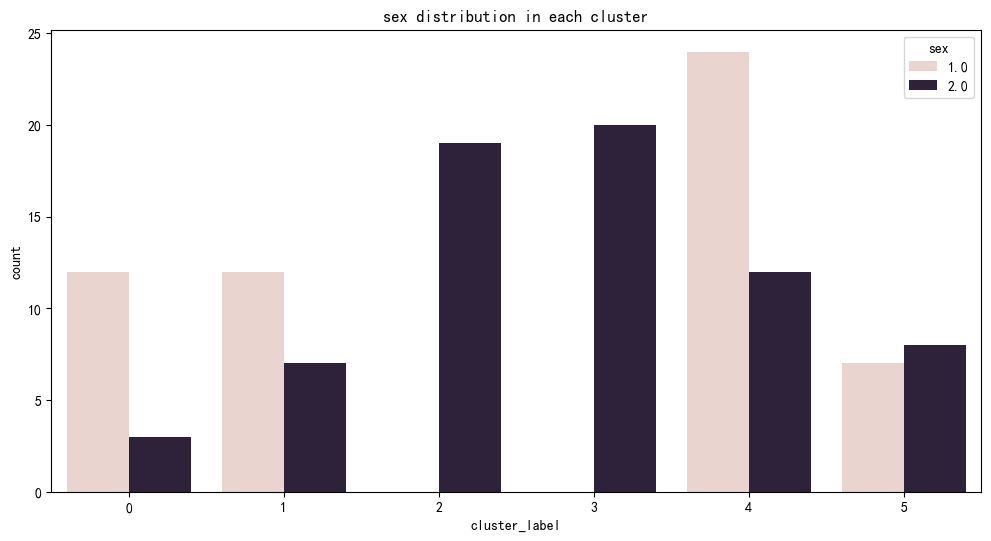

In [45]:
mean_Evalue = df_cluster['E'].mean()
mean_Nvalue = df_cluster['N'].mean()
mean_Pvalue = df_cluster['P'].mean()

print(f"the mean value of E is {mean_Evalue}")
print(f"the mean value of N is {mean_Nvalue}")
print(f"the mean value of P is {mean_Pvalue}")
print('---------------------------------')



## 现在需要对每个簇里面的艾森克人格三个维度E,N,P分析他们的范围
cluster_group = df_cluster.groupby('cluster_label')
for name, group in cluster_group:
    print(f"Cluster {name}")
    print(group[['E', 'N', 'P']].describe())
    print("\n")
    
# 画出每个簇里面的性别分布
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_label', hue='sex', data=df_cluster)
plt.title('sex distribution in each cluster')
plt.show()

#### 变异性分析
- cluster0(51.56,71.67,56.7): 薰衣草对这个簇的每个人的PAD三个维度的影响统一，变异性低；薄荷柠檬变异性高
- cluster1(54.4,54.69,61.44):
- cluster2(64.18,64.26,45.87):
- cluster3(31.05,65.10,58.55):
- cluster4(45.89,46.10,45.58):
- cluster5(62.37,41.07,45.36):

In [12]:
# Only select numeric columns for calculating mean and std
numeric_columns = ['PP', 'A', 'D']

#1. 首先计算每个cluster里面每个香味对应的PP,A,D三个维度的均值和标准差，然后使用表格展示
fragarance_stats = df_cluster.groupby(['cluster_label', '香味'])[numeric_columns].agg(['mean', 'std'])
# 整理为表格的形式
fragarance_stats = fragarance_stats.reset_index()

# Flatten the multi-level columns
fragarance_stats.columns = ['cluster_label', 'fragrance'] + [f"{col}_{stat}" for col, stat in fragarance_stats.columns[2:]]


# 现在我要根据标准差来判断变异性，找出每个簇里面变异性最稳定的香味和最不稳定的香味
for col in numeric_columns:
        # 计算变异性
        fragarance_stats[f"{col}_variation"] = np.abs(fragarance_stats[f"{col}_std"] / fragarance_stats[f"{col}_mean"])


# 找出每个簇里面变异性最稳定的香味和最不稳定的香味
min_variations = {'PP_variation': {}, 'A_variation': {}, 'D_variation': {}}
max_variations = {'PP_variation': {}, 'A_variation': {}, 'D_variation': {}}
# 遍历不同的 cluster label
for cluster in fragarance_stats['cluster_label'].unique():
    cluster_data = fragarance_stats[fragarance_stats['cluster_label'] == cluster]
    
    # 找出每种 variation 的最小值及其对应的香味
    for variation in ['PP_variation', 'A_variation', 'D_variation']:
        min_value = cluster_data[variation].min()
        min_fragrance = cluster_data[cluster_data[variation] == min_value]['fragrance'].values[0]
        
        min_variations[variation][cluster] = min_fragrance
        
        max_value = cluster_data[variation].max()
        max_fragrance = cluster_data[cluster_data[variation] == max_value]['fragrance'].values[0]
        
        max_variations[variation][cluster] = max_fragrance
        
print(f"the min_variations are {min_variations}")
print(f"the max_variations are {max_variations}")



# 接下来我需要统计: PP, A, D三个维度的最稳定和最不稳定的香味
# 计算PP,A,D三个维度的变异性


fragrance_group = df_cluster.groupby('香味')[numeric_columns].agg(['mean', 'std'])
fragrance_group.columns = [f"{col}_{stat}" for col, stat in fragrance_group.columns]
for col in numeric_columns:
    fragrance_group[f"{col}_variation"] = np.abs(fragrance_group[f"{col}_std"] / fragrance_group[f"{col}_mean"])

# print(fragrance_group)
all_fragrance = {}
for col in numeric_columns:
    min_variation = fragrance_group[f"{col}_variation"].idxmin()
    max_variation = fragrance_group[f"{col}_variation"].idxmax()
    all_fragrance[col] = {'min_variation': min_variation, 'max_variation': max_variation}
# print(all_fragrance)

         


the min_variations are {'PP_variation': {0: '薰衣草', 1: '柠檬', 2: '薰衣草', 3: '薰衣草', 4: '无香', 5: '无香'}, 'A_variation': {0: '无香', 1: '无香', 2: '柠檬', 3: '薰衣草', 4: '无香', 5: '薄荷'}, 'D_variation': {0: '薰衣草', 1: '薄荷', 2: '薰衣草', 3: '薄荷', 4: '柠檬', 5: '无香'}}
the max_variations are {'PP_variation': {0: '薄荷', 1: '薰衣草', 2: '无香', 3: '柠檬', 4: '柠檬', 5: '薰衣草'}, 'A_variation': {0: '薰衣草', 1: '薄荷', 2: '薄荷', 3: '无香', 4: '薰衣草', 5: '薰衣草'}, 'D_variation': {0: '柠檬', 1: '柠檬', 2: '薄荷', 3: '柠檬', 4: '薰衣草', 5: '薰衣草'}}


### 使用ANOVA 确定香味在每个维度的分数是否存在显著差异，进行事后检验识别特定差异，这样得到哪个香味在哪个分数上最有效。但是从我们的聚类结果说明，表现优异

In [15]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

def perform_anova_analysis(df, numeric_columns):
    results = {}
    
    for col in numeric_columns:
        # 准备各组数据
        groups = []
        fragrances = []
        
        for fragrance in df['香味'].unique():
            group_data = df[df['香味'] == fragrance][col]
            groups.append(group_data)
            fragrances.append(fragrance)
            
        # 计算组间和组内方差
        group_means = [np.mean(g) for g in groups]
        overall_mean = np.mean([x for g in groups for x in g])
        
        # 组间方差
        between_ss = sum(len(g) * (gm - overall_mean)**2 
                        for g, gm in zip(groups, group_means))
        between_df = len(groups) - 1
        
        # 组内方差
        within_ss = sum(sum((x - gm)**2 
                       for x in g) 
                       for g, gm in zip(groups, group_means))
        within_df = sum(len(g) for g in groups) - len(groups)
                
        # ANOVA检验
        f_statistic, p_value = f_oneway(*groups)
        
        results[col] = {
            'anova': {
                'f_statistic': f_statistic,
                'p_value': p_value,
                'between_variance': between_ss/between_df,
                'within_variance': within_ss/within_df
            }
        }
        
        # 显著时进行Tukey检验
        if p_value < 0.05:
            tukey = pairwise_tukeyhsd(
                df[col],
                df['香味'],
                alpha=0.05
            )
            results[col]['tukey'] = tukey.summary()
            
    return results




# 每个簇都要进行ANOVA分析
anova_results = {}
for cluster in df_cluster['cluster_label'].unique():
    cluster_data = df_cluster[df_cluster['cluster_label'] == cluster]
    anova_results[cluster] = perform_anova_analysis(cluster_data, numeric_columns)

# Print the ANOVA results in a more readable format
for cluster, results in anova_results.items():
    print(f"\nCluster {cluster}:")
    for dimension, stats in results.items():
        print(f"\n{dimension}:")
        print(f"ANOVA results:")
        print(f"F-statistic: {stats['anova']['f_statistic']:.4f}")
        print(f"p-value: {stats['anova']['p_value']:.4f}")
        print(f"Between-group variance: {stats['anova']['between_variance']:.4f}")
        print(f"Within-group variance: {stats['anova']['within_variance']:.4f}")
        
        if 'tukey' in stats:
            print("\nTukey HSD results:")
            print(stats['tukey'])
        print("-" * 50)



Cluster 2:

PP:
ANOVA results:
F-statistic: 0.5957
p-value: 0.6275
Between-group variance: 0.3791
Within-group variance: 0.6365
--------------------------------------------------

A:
ANOVA results:
F-statistic: 0.7603
p-value: 0.5337
Between-group variance: 0.5282
Within-group variance: 0.6948
--------------------------------------------------

D:
ANOVA results:
F-statistic: 0.4545
p-value: 0.7180
Between-group variance: 1.8624
Within-group variance: 4.0981
--------------------------------------------------

Cluster 3:

PP:
ANOVA results:
F-statistic: 1.0986
p-value: 0.3785
Between-group variance: 1.3115
Within-group variance: 1.1937
--------------------------------------------------

A:
ANOVA results:
F-statistic: 1.1847
p-value: 0.3468
Between-group variance: 1.2458
Within-group variance: 1.0516
--------------------------------------------------

D:
ANOVA results:
F-statistic: 0.0842
p-value: 0.9677
Between-group variance: 0.1708
Within-group variance: 2.0297
-----------------------

#### 现在设定P,A,D的阈值，然后对P,A,D计算每个香味的得分（超出阈值的量）,如果多个香味超出则进行排序

In [32]:
# thresold == 0
thresholds = {
    'PP': 0,
    'A': 0,
    'D': 0
}
# 现在需要计算每个簇中的每个香味在P,A,D不同维度上的得分，根据阈值计算每个香味在PP,A,D三个维度上的得分（得分的公式是超出阈值的部分+均值）

def calculate_cluster_scores(df, thresholds):
    # 初始化结果字典
    cluster_scores = {}
    
    # 按簇号遍历
    for cluster in df['cluster_label'].unique():
        cluster_data = df[df['cluster_label'] == cluster]
        cluster_scores[cluster] = {'PP': {}, 'A': {}, 'D': {}}
        
        # 按香味遍历
        for fragrance in cluster_data['香味'].unique():
            frag_data = cluster_data[cluster_data['香味'] == fragrance]
            
            # 计算每个维度的得分
            for dim in ['PP', 'A', 'D']:
                values = frag_data[dim]
                mean = values.mean()
                # 计算超过阈值部分的和
                diff_sum = sum(values - thresholds[dim])
                # 最终得分 = 均值 + 超过阈值的总和
                score = mean + diff_sum
                cluster_scores[cluster][dim][fragrance] = round(score, 2)
    
    return cluster_scores


from tabulate import tabulate
from pprint import pprint

# 使用示例
scores = calculate_cluster_scores(df_cluster, thresholds)

pprint(scores)



{0: {'A': {'无香': -5.31, '柠檬': -1.33, '薄荷': -3.75, '薰衣草': -1.25},
     'D': {'无香': -3.12, '柠檬': -1.33, '薄荷': -2.81, '薰衣草': 5.0},
     'PP': {'无香': -3.44, '柠檬': -2.0, '薄荷': -2.19, '薰衣草': -2.19}},
 1: {'A': {'无香': -3.6, '柠檬': -0.31, '薄荷': 0.0, '薰衣草': 3.6},
     'D': {'无香': -2.7, '柠檬': -0.62, '薄荷': -5.4, '薰衣草': 3.3},
     'PP': {'无香': -4.2, '柠檬': -2.81, '薄荷': -1.5, '薰衣草': -0.6}},
 2: {'A': {'无香': -1.2, '柠檬': -4.06, '薄荷': 0.0, '薰衣草': -2.4},
     'D': {'无香': -2.7, '柠檬': -4.69, '薄荷': -0.9, '薰衣草': -9.3},
     'PP': {'无香': -0.6, '柠檬': -3.44, '薄荷': -3.0, '薰衣草': -4.2}},
 3: {'A': {'无香': -1.2, '柠檬': -2.4, '薄荷': 3.6, '薰衣草': -3.0},
     'D': {'无香': 0.9, '柠檬': 0.6, '薄荷': 3.0, '薰衣草': 2.1},
     'PP': {'无香': -2.1, '柠檬': -1.5, '薄荷': 2.1, '薰衣草': -5.4}},
 4: {'A': {'无香': 2.22, '柠檬': 1.11, '薄荷': -1.11, '薰衣草': -1.11},
     'D': {'无香': 9.44, '柠檬': 10.28, '薄荷': -3.61, '薰衣草': 0.28},
     'PP': {'无香': -2.78, '柠檬': 0.0, '薄荷': -0.28, '薰衣草': 0.0}},
 5: {'A': {'无香': 2.5, '柠檬': 4.69, '薄荷': 5.67, '薰衣草': 2.5},
     'D

#### 现在需要根据score制定好推荐规则，然后使用xgboost进行分类

In [39]:
# 根据score制定推荐规则，观察每个簇里面，P,A,D三个维度，哪些得分超过0，如果有几个香味的得分超过0，进行排序；如果没有超过0的，那么就推荐最高的、

def recommend_fragrance(scores):
    recommendations = {}
    
    for cluster, cluster_scores in scores.items():
        recommendations[cluster] = {}
        
        for dim in ['PP', 'A', 'D']:
            dim_scores = cluster_scores[dim]
            dim_scores = {k: v for k, v in dim_scores.items() if v > 0}
            
            if len(dim_scores) == 0:
                max_score = max(cluster_scores[dim].values())
                max_fragrance = max(cluster_scores[dim], key=cluster_scores[dim].get)
                recommendations[cluster][dim] = ([max_fragrance], [max_score])
            else:
                sorted_scores = sorted(dim_scores.items(), key=lambda x: x[1], reverse=True)
                recommendations[cluster][dim] = (list(zip(*sorted_scores)))
                
    return recommendations

recommendations = recommend_fragrance(scores)
# pprint(recommendations)
            

{0: {'A': (['薰衣草'], [-1.25]), 'D': [('薰衣草',), (5.0,)], 'PP': (['柠檬'], [-2.0])},
 1: {'A': [('薰衣草',), (3.6,)], 'D': [('薰衣草',), (3.3,)], 'PP': (['薰衣草'], [-0.6])},
 2: {'A': (['薄荷'], [0.0]), 'D': (['薄荷'], [-0.9]), 'PP': (['无香'], [-0.6])},
 3: {'A': [('薄荷',), (3.6,)],
     'D': [('薄荷', '薰衣草', '无香', '柠檬'), (3.0, 2.1, 0.9, 0.6)],
     'PP': [('薄荷',), (2.1,)]},
 4: {'A': [('无香', '柠檬'), (2.22, 1.11)],
     'D': [('柠檬', '无香', '薰衣草'), (10.28, 9.44, 0.28)],
     'PP': (['柠檬'], [0.0])},
 5: {'A': [('薄荷', '柠檬', '无香', '薰衣草'), (5.67, 4.69, 2.5, 2.5)],
     'D': [('柠檬', '无香', '薄荷', '薰衣草'), (5.94, 5.62, 5.33, 4.06)],
     'PP': [('无香', '薄荷', '柠檬', '薰衣草'), (5.94, 4.67, 4.38, 3.12)]}}
